<a href="https://colab.research.google.com/github/06081992/Machine-Learning-first-steps/blob/main/Arboles_de_decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árboles de decisión
Aplicación en un problema de clasificación con datos referentes a la morfologías y otras características de relevancia clínica en el diagnóstico del cáncer de mama.

##Descripción del proyecto


In [2]:
from rich.console import Console
console = Console()

# Este dataset está integrados en el conjunto de datos de ejemplo de Scikit-learn
# Referencias: https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
# El método DESCR nos permite acceder a un docstring con información sobre el conjunto de datos
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

##Exploración y preprocesado

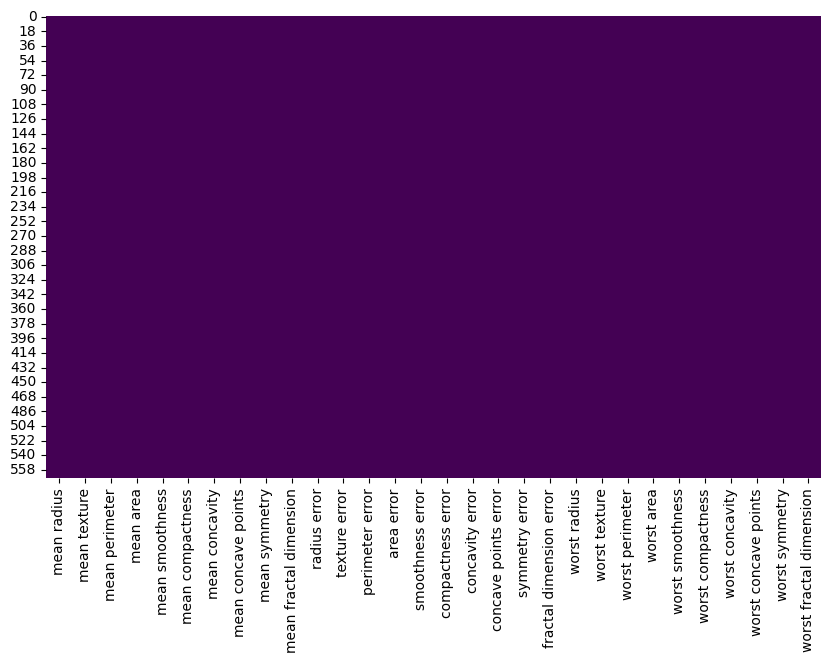

In [5]:
#Cargamos las librerías necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes #Asumo que "data" proviene de una variable llamada "data"

#Creamos un DataFrame de Pandas apartir del diccionario de datos
df = pd.DataFrame(data.data, columns=data.feature_names)

#Comprobamos la presencía de valores perdidos por variable
missing_values = df.isnull().sum()

#Tambien podemos visualizar la distribución de valores perdidos
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title=("Distribución de Valores Perdidos")
plt.show()

In [6]:
# El objetivo del proyecto es obtener una buena precisión clasificando
# los ejemplo en el conjunto de prueba en las dos categorías que expresan
# si el tumor es maligno o benigno
print("Clases objetivo:", data.target_names)

Clases objetivo: ['malignant' 'benign']


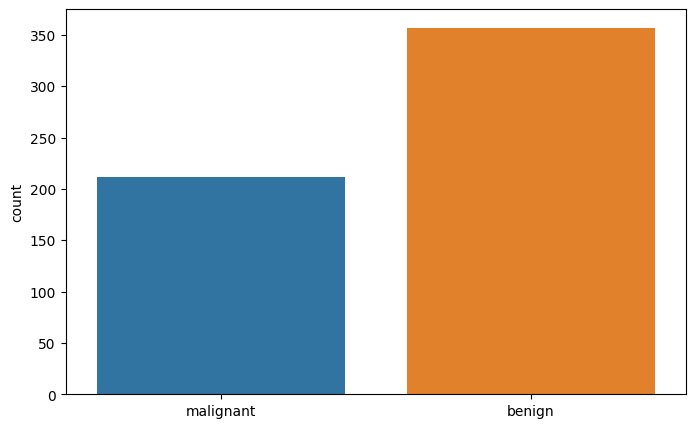

In [7]:

# Separamos los conjuntos de datos en características y variable objetivo
X, y = data.data, data.target

# Veámos en un gráfico cuantas instancias tenemos de cada clase
fig = plt.figure(1, figsize=(8, 5))
ax = fig.add_subplot(111)
sns.countplot(x=data.target, ax=ax)
ax.set_xticklabels(data.target_names)
plt.show()

TypeError: ignored

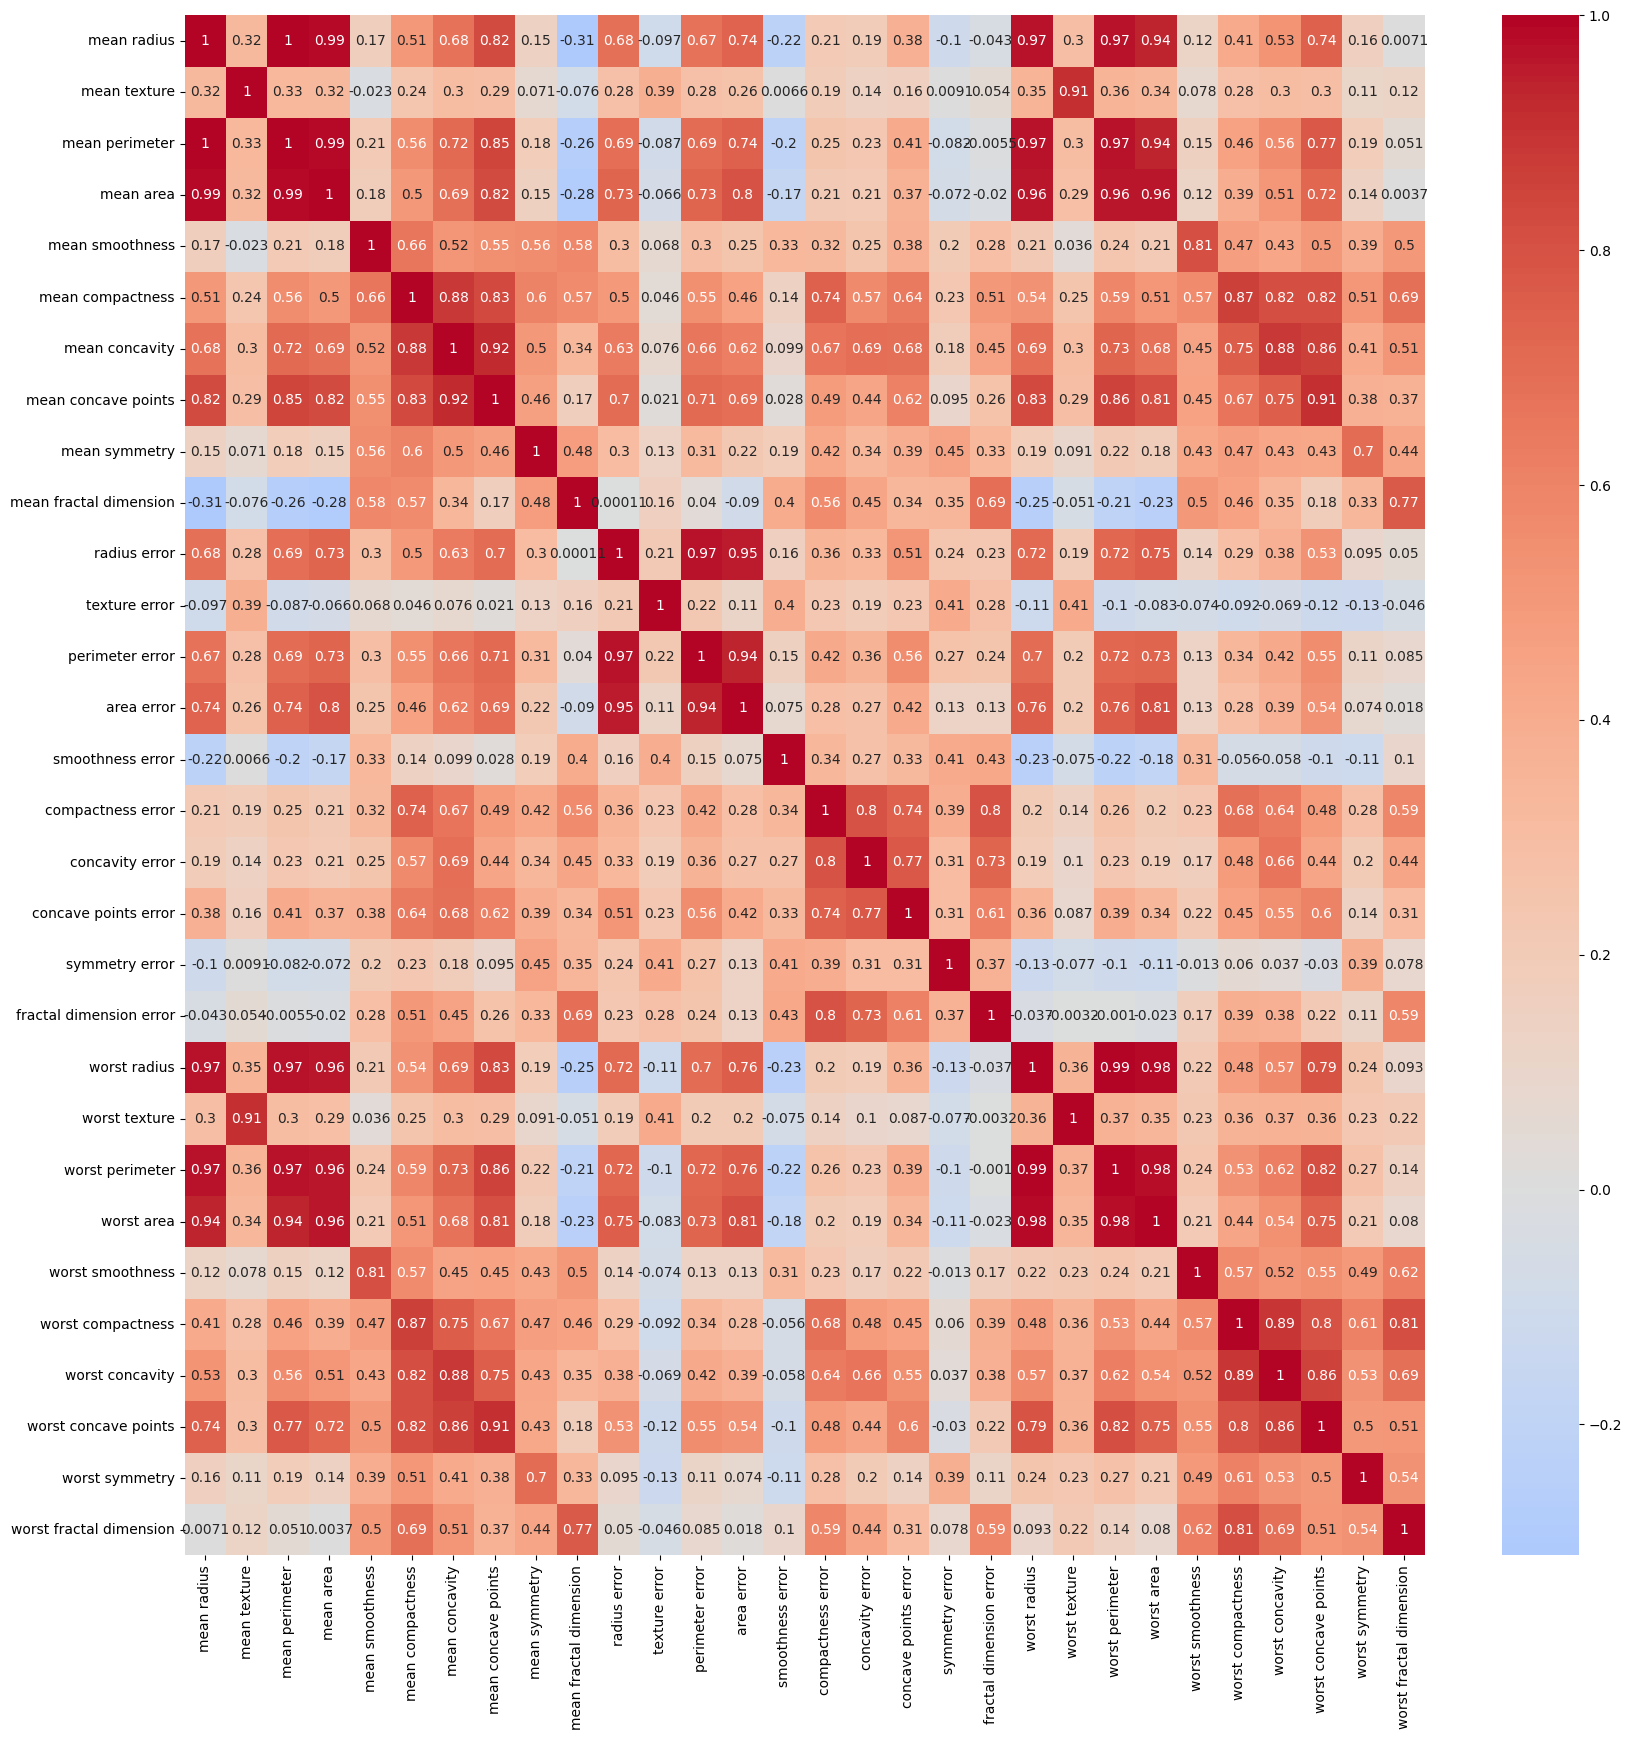

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos una figura para visualizar la matriz de correlación
plt.figure(figsize=(20, 20))

# Generar un mapa de calor de la matriz de correlación
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Configuramos títulos y etiquetas de los ejes
plt.title('Matriz de Correlación')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

In [11]:
# En el gráfico anterior podemos comprobar que hay varias variables que presentan
# una correlación alta, vamos a ver cómo podemos descartarlas

# Implementamos una función que cree una lista con las columnas cuyo índice
# de correlación es inferior a cierto umbral (thres)
def find_lc_cols(df, thres):
  """
  Encuentra las variables con una correlación mayor que el umbral (thres)
  """
  corr = df.corr()
  columns = np.full((corr.shape[0],), True, dtype=bool)
  for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
      if abs(corr.iloc[i,j]) >= thres:
        if columns[j]: columns[j] = False

  return columns

# Ejecutamos la función y recuperamos las columnas/variables con baja correlación
lc_cols = find_lc_cols(df, thres=0.90)
print("Variable/s con baja (<90%) correlación:", df.columns[lc_cols].tolist())

Variable/s con baja (<90%) correlación: ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst symmetry', 'worst fractal dimension']


In [12]:
# Construimos un Dataframe que sólo incluya las columnas seleccionadas
s_cols = df.columns[lc_cols]
df_s = df[s_cols]
console.log(f"Variables seleccionadas: {len(df_s.columns)}", style="bold blue")
console.log(f"De un total de: {len(df.columns)}", style="bold blue")
console.log(f"\nDataset final: {df_s}", style="yellow")

[20:07:05] Variables seleccionadas: 20                                            <ipython-input-12-562784f24eba>:4

           De un total de: 30                                                     <ipython-input-12-562784f24eba>:5

                                                                                  <ipython-input-12-562784f24eba>:6
           Dataset final:      mean radius  mean texture  mean smoothness  mean                                    
           compactness  \                                                                                          
           0          17.99         10.38          0.11840           0.27760                                       
           1          20.57         17.77          0.08474           0.07864                                       
           2          19.69         21.25          0.10960           0.15990                                       
           3          11.42         20.38          0.14250           0.28390                                       
           4          20.29         14.34          0.10030           0.13280                                       
           ..           ...           ...              ...               ...                                       
           564        21.56         22.39          0.11100           0.11590                                       
           565        20.13         28.25          0.09780           0.10340                                       
           566        16.60         28.08          0.08455           0.10230                                       
           567        20.60         29.33          0.11780           0.27700                                       
           568         7.76         24.54          0.05263           0.04362                                       
                                                                                                                   
                mean concavity  mean symmetry  mean fractal dimension  radius                                      
           error  \                                                                                                
           0           0.30010         0.2419                 0.07871                                              
           1.0950                                                                                                  
           1           0.08690         0.1812                 0.05667                                              
           0.5435                                                                                                  
           2           0.19740         0.2069                 0.05999                                              
           0.7456                                                                                                  
           3           0.24140         0.2597                 0.09744                                              
           0.4956                                                                                                  
           4           0.19800         0.1809                 0.05883                                              
           0.7572                                                                                                  
           ..              ...            ...                     ...                                              
           ...                                                                                                     
           564         0.24390         0.1726                 0.05623                                              
           1.1760                                                                                                  
           565         0.14400         0.1752                 0.05533                                              
           0.7655                                                                                                  
           566         0.09251         0.1590                 0.05648                                              
           0.4564                                       

In [13]:
# Tras depurar nuestro dataset podemos proceder a crear los conjuntos de
# entrenamiento y prueba

# Usaremos la función de Scikit-learn para configurar los conjuntos de entrenamiento
# y prueba
from sklearn.model_selection import train_test_split
X = df_s[df_s.columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Veámos cuál es la forma de estos arrays
print(" - X_train:", X_train.shape)
print(" - X_test:", X_test.shape)
print(" - y_train:", y_train.shape)
print(" - y_test:", y_test.shape)

 - X_train: (455, 20)
 - X_test: (114, 20)
 - y_train: (455,)
 - y_test: (114,)


## Árbol de decisión

In [14]:
# Es hora de configurar nuestro clasificador y ajustar el modelo a los datos
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(criterion='gini', max_depth=2)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [15]:
# Ajustado el modelo vamos a evaluar su desempeño
# Calculamos las predicciones del modelo entrenado sobre el conjunto de prueba
y_test_pred = clf_dt.predict(X_test)
# Utilizando las etiquetas verdaderas en el conjunto de pruba, calculamos la
# precisión del modelo
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_test_pred) * 100
print("La precisión del modelo es de: {:0.2f}".format(acc))

La precisión del modelo es de: 91.23


TypeError: ignored

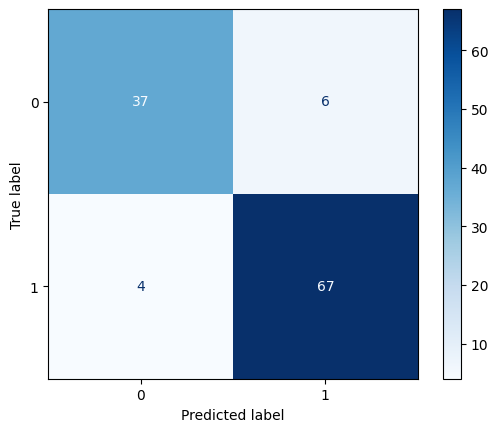

In [16]:
# Veámos ahora la matriz de confusión para obtener una mejor valoración del
# desempeño. Recuerda que en el conjunto de prueba tenemos 114 sujetos
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)

# Crear una instancia de ConfusionMatrixDisplay para visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Configurar el título y mostrar la matriz de confusión
disp.plot(cmap='Blues', values_format='d')
plt.title("Matriz de Confusión")
plt.show()

## Resultados
Los resultados obtenidos resaltan la solidez de nuestro modelo, demostrando una precisión de clasificación superior al 91%. Además, logra identificar de manera precisa 67 casos malignos y 37 casos benignos. Aunque destaca por su rendimiento, se han registrado 6 falsos positivos y 4 falsos negativos, lo que nos ofrece valiosa información sobre áreas que podrían ser afinadas para optimizar aún más su eficacia.

## Aplicar Modelo de Regresión Logística
Veámos qué tal lo hace un modelo de regresión logística

https://www.kaggle.com/neisha/heart-disease-prediction-using-logistic-regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Crear y ajustar el modelo de Regresión Logística
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_test_pred = clf_lr.predict(X_test)

# Calcular y mostrar la precisión del modelo
accuracy = accuracy_score(y_test, y_test_pred) * 100
print("La precisión del modelo (Regresión Logística) es: {:.2f}%".format(accuracy))


La precisión del modelo (Regresión Logística) es: 95.61%


## Curva ROC
La curva ROC (Receiver Operating Characteristic) es una herramienta gráfica utilizada en la evaluación de modelos de clasificación. Proporciona una representación visual de cómo un modelo es capaz de discriminar entre dos clases distintas al variar el umbral de decisión.

Se crea trazando la tasa de verdaderos positivos (Sensibilidad) en el eje y y la tasa de falsos positivos (1 - Especificidad) en el eje x. Aquí hay una explicación de los términos involucrados:

- **Sensibilidad (True Positive Rate - TPR):** Mide la proporción de instancias positivas que el modelo clasifica correctamente como positivas. Se calcula como TP / (TP + FN), donde TP son los verdaderos positivos (instancias positivas clasificadas correctamente) y FN son los falsos negativos (instancias positivas clasificadas incorrectamente como negativas).

- **Especificidad (True Negative Rate - TNR):** Mide la proporción de instancias negativas que el modelo clasifica correctamente como negativas. Se calcula como TN / (TN + FP), donde TN son los verdaderos negativos (instancias negativas clasificadas correctamente) y FP son los falsos positivos (instancias negativas clasificadas incorrectamente como positivas).

En la curva ROC, cada punto en la curva representa un umbral de decisión diferente, lo que afecta la tasa de verdaderos positivos y la tasa de falsos positivos. Un modelo ideal tendría una curva ROC que alcance el rincón superior izquierdo (sensibilidad 1, especificidad 1), lo que significa que no hay falsos positivos y todos los verdaderos positivos se clasifican correctamente.

El área bajo la curva ROC (AUC) es también una métrica importante. Mide la capacidad global de discriminación del modelo en todas las posibles decisiones de umbral. Un AUC cercano a 1 indica un modelo con un buen poder discriminativo, mientras que un AUC cercano a 0.5 sugiere un rendimiento similar al azar.

TypeError: ignored

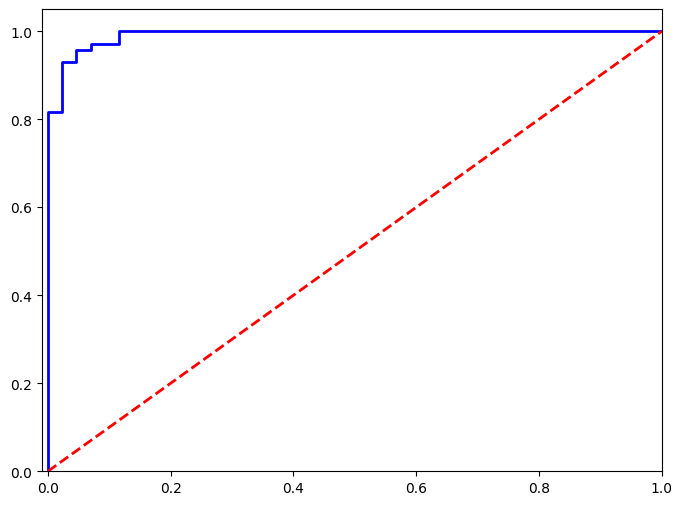

In [19]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculamos los valores de probabilidad asignados por el modelo sobre el conjunto de prueba
y_score = clf_lr.predict_proba(X_test)[:,1]

# Calculamos la tasa de falsos positivos y verdaderos positivos
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Crear la figura para visualizar la curva ROC
plt.figure(figsize=(8, 6))

# Graficar la curva ROC
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')

# Configurar los límites y etiquetas de los ejes, y agregar una leyenda
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Curva ROC (Regresión Logística)')
plt.xlabel('Tasa Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa Verdaderos Positivos (Sensibilidad)')
plt.legend(loc='lower right')
plt.grid(True)